# Partie 1 : Modélisation 

### 1. Définition des éléments de base

- **Véhicule** :
  - $V$ : Un seul véhicule disponible pour la collecte et la livraison.

- **Nœuds** :
  - $N$ : Ensemble des villes.
  - $s_0$ : Nœud de départ du véhicule.

- **Requêtes** :
  - $R$ : Ensemble des requêtes de collecte et de livraison.
  - Chaque requête $r_m$ est définie par une paire $(P_m, D_m)$, où $P_m$ est le point de collecte de l'objet $m$ et $D_m$ est un point de livraison de l'objet m.

- **Temps** :
  - $t$ : Temps actuel, variable dynamique.
  - $t_m^{pickup}$ : Temps de collecte pour la requête $r_m$.
  - $t_m^{delivery}$ : Temps de livraison pour la requête $r_m$.
  - $T$ : Temps final de la tournée.

- **Graph** :
  - $A(t) \subseteq N \times N$ : Ensemble des arcs disponibles à l'instant $t$, reflétant la connectivité entre les villes. Si $A_{ij}(t) \neq 1$, alors il n'y a pas de chemin entre $i$ et $j$

### 2. Variables de décision

- $x_{ij}(t)$ : Variable binaire indiquant si le véhicule se déplace du nœud $i$ au nœud $j$ à l'instant $t$ (1 si oui, 0 sinon).
- $p_i(t)$ : Variable binaire indiquant si le nœud $i$ est visité pour une collecte à l'instant $t$ (1 si oui, 0 sinon).
- $d_i(t)$ : Variable binaire indiquant si le nœud $i$ est visité pour une livraison à l'instant $t$ (1 si oui, 0 sinon).

### 3. Contraintes

1. **Collecte avant livraison** :

   $
   t_m^{pickup} \leq t_m^{delivery} \quad \forall r_m \in R
   $


2. **Lien collecte-livraison** :

   $
   d_i(t) \leq \sum_{t' \leq t} p_{P_m}(t') \quad \forall t, \forall i \text{ tel que } i = D_m
   $

3. **Conservation de flux** :

   $
   \sum_{j}^N x_{ij}(t) = \sum_{j}^N x_{jk}(t+1) \quad \forall i, k \in N, \forall t$ avec $i \neq j $ et $k \neq j
   $

4. **Départ initial** :

   $
   \sum_{j}^N x_{s_0 j}(0) = 1
   $
   avec
   $
   A_{s_0, j}(0) = 1
   $

5. **Retour final** :

   $
   \sum_{i}^N x_{i s_0}(T) = 1
   $
   avec
   $ 
   A_{i, s_0}(T) = 1
   $

6. **Fin de livraison** :

   $
   \sum_{i \in N} \sum_{t \leq T} d_i(t) = \text{ \(\lvert R \rvert\)}
   $
   
   Cette contrainte garantit que toutes les livraisons nécessaires ont été effectuées à la fin de la tournée.

7. **Connectivité des arcs** :

   $
   x_{ij}(t) \leq A_{ij}(t) \quad \forall i, j \in N, \forall t
   $
   où $A_{ij}(t)$ est une variable binaire indiquant si un arc entre $i$ et $j$ est disponible à l'instant $t$.

### 4. Fonction objectif

Minimiser la distance totale parcourue par le véhicule, tenant compte des variations temporelles des distances :
$[
\text{Minimiser} \quad \sum_{t} \sum_{i} \sum_{j} C_{ij}(t) \cdot x_{ij}(t)
]$
où $C_{ij}(t)$ est la distance entre les nœuds $i$ et $j$ à l'instant $t$, si l'arc $(i, j) \in A(t)$.

# Méthode de résolution choisie
## Méthode de Résolution : Algorithme de Colonies de Fourmis (Ant Colony Optimization, ACO)
L'algorithme de colonies de fourmis (ACO) est une métaheuristique inspirée par le comportement des fourmis cherchant de la nourriture. Cet algorithme est particulièrement utile pour résoudre des problèmes d'optimisation combinatoire, tels que le problème du voyageur de commerce (TSP) ou le problème du sac à dos. Il repose sur la coopération indirecte des fourmis via le dépôt et l'évaporation de phéromones.

### Détails de l'Algorithme Utilisé
## Initialisation :

Paramètres : Définir les paramètres clés tels que le nombre de fourmis, le nombre d'itérations, les taux de phéromones (initial, volatilité), et les coefficients influençant les phéromones et l'heuristique.
Phéromones : Initialiser les niveaux de phéromones sur chaque élément (objet, chemin, etc.) de manière uniforme ou avec des valeurs spécifiques.

### Construction des Solutions :

Voisinage et Sélection : Chaque fourmi construit une solution en ajoutant progressivement des composants (villes à visiter dans notre cas). La probabilité de choisir un composant dépend des niveaux de phéromones et de l'heuristique locale.
Heuristique : Utiliser une fonction heuristique (par exemple, les couts de chaque chemins) pour guider les choix des fourmis.
Contraintes : Assurer que les solutions respectent les contraintes du problème.

### Mise à Jour des Phéromones :

Évaporation : Réduire les niveaux de phéromones de manière uniforme pour simuler la volatilité naturelle des phéromones.
Dépôt : Augmenter les niveaux de phéromones sur les composants utilisés dans les solutions de haute qualité trouvées par les fourmis.


### Critère d'Arrêt :

Itérations : Répéter les étapes de construction et de mise à jour des phéromones pour un nombre fixe d'itérations ou jusqu'à ce que les solutions convergent.

### Modélisation du Problème
Pour appliquer l'ACO à notre problème voici comment nous modélisons chaque étape selon le formalisme de la métaheuristique :

#### Représentation des Solutions :

Une solution est représentée comme un vecteur binaire de longueur égale au nombre de villes au carré, où chaque élément indique si on passe par le chemin $ij$ durant notre trajet ou non.
#### Voisinage :

Le voisinage d'une solution consiste à inverser l'inclusion de chaque objet, générant ainsi des solutions voisines en ajoutant ou retirant un objet du sac.
#### Fonction Heuristique :

L'heuristique priorise certains chemins $P_{ij}^k = $ $\frac{\tau_{ij}(t)^\alpha \cdot \eta_{ij}^\beta}{\sum_{l \in J_i^k} \tau_{il}(t)^\alpha \cdot \eta_{il}^\beta}$

$p_{ij}^k(t) $ : Probabilité de transition de la ville $i$ à la ville $j$ pour la fourmi $k$ au temps $t$.

$\tau_{ij}(t)  $: Quantité de phéromones sur le chemin de la ville $i$ à la ville $j$ au temps $t$.
 
$\eta_{ij}$ : Heuristique de visibilité, typiquement l'inverse de la distance (le temps de déplacement entre $i$ et $j$ qui varie dans le temps dans notre cas) entre les villes $i$ et $j$.
 
$\alpha $ : Paramètre qui contrôle l'importance des phéromones.

$\beta $ : Paramètre qui contrôle l'importance de l'heuristique de visibilité.

$J_i^k $ : Ensemble des villes non visitées par la fourmi $k$ lors de la visite de la ville $i$.

#### Opérations de Sélection :

La sélection des chemins se fait de manière probabiliste en fonction de l'heuristique, cependant comme cette derniere est basée sur la quantité de phéromones de chaque chemins on finira par obtenir des chemin optimisés respectant nos contraintes.

### Conclusion
L'algorithme de colonies de fourmis (ACO) est une approche efficace pour résoudre notre problème. Il exploite la coopération indirecte entre les fourmis via les phéromones pour explorer l'espace de recherche de manière équilibrée entre exploration et exploitation. En suivant le formalisme de cette métaheuristique, nous avons modélisé le problème, construit des solutions viables et mis à jour les phéromones pour guider les itérations successives vers des solutions de meilleure qualité.

# Partie 2 : Implémentation 

In [5]:
import numpy as np
import random as rand
import math as m
import time
import networkx as nx
from ipywidgets import IntProgress
from IPython.display import display
from matplotlib import pyplot as plt

In [6]:
def generate_random_symmetrical_boolean_graph(n):
    while True:
        A = np.triu(np.random.randint(0, 2, (n, n)), 1)
        A += A.T
        if np.all(A.sum(axis=0)):
            return A

In [7]:
def generate_random_collect_points(cities):
    return np.random.randint(0, 2, cities)

In [8]:
def generate_random_delivery_requests(cities, collect_points):
    deliveries = set()
    for i, collect in enumerate(collect_points):
        if collect:
            number_of_drop_points = rand.randint(1, cities)
            deliveries.update((i, rand.randint(0, cities - 1)) for _ in range(number_of_drop_points))
    return sorted(deliveries)

In [13]:
def check_delivery_done(R, D):
    return all(item in D for item in R)

In [14]:
def initialize_pheromones(A, initial_pheromone):
    return np.multiply(A, np.full(A.shape, initial_pheromone))

In [15]:
def update_pheromones(pheromones, paths, deliveries, phi, Temp, amplitude, offset, frequency):
    for path, cost in paths:
        if cost == float('inf'):
            continue
        delivery_count = sum(1 for city in path if any(city in deliveries for obj in deliveries))
        for t, (i, j) in enumerate(zip(path[:-1], path[1:])):
            pheromones[i][j] += (Q / cost) * (delivery_count / len(deliveries)) * (1.0 / C(i, j, t, phi, Temp, amplitude, offset, frequency))
    pheromones *= (1 - RHO)
    return pheromones

In [16]:
def C(i, j, t, phi, Temp, amplitude, offset, frequency):
    return max(1, round((amplitude * m.sin(frequency * t + phi[i][j]) + offset) * Temp[i][j], 4)) if i != j else float('inf')

In [38]:
def construct_path(graph, pheromones, deliveries, start_city, phi, Temp, amplitude, offset, frequency):
    n = len(graph)
    path = [start_city]
    cost = 0
    visited = set([start_city])
    collected_items = set()
    delivered_items = set()
    pending_deliveries = set(deliveries)

    t = 0  # Initialize time for dynamic cost calculation
    all_collect_points = set(i for i, _ in deliveries)

    while pending_deliveries:
        current = path[-1]
        choices = [i for i in range(n) if graph[current][i] > 0 and i != current]
        probabilities = np.array([pheromones[current][i] ** ALPHA * (1.0 / C(current, i, t, phi, Temp, amplitude, offset, frequency)) ** BETA for i in choices])
        total = probabilities.sum()
        if total == 0:
            next_city = start_city
        else:
            probabilities /= total
            next_city = rand.choices(choices, weights=probabilities, k=1)[0]

        if next_city == start_city:
            break

        path.append(next_city)
        visited.add(next_city)
        cost += C(current, next_city, t, phi, Temp, amplitude, offset, frequency)

        # Check and update collections
        if next_city in all_collect_points:
            collected_items.add(next_city)

        # Check and update deliveries
        for item, location in list(pending_deliveries):
            if next_city == location:
                delivered_items.add((item, location))
                pending_deliveries.remove((item, location))
                if next_city == item:
                    collected_items.add(item)

        t = cost
        
    # Ensure all deliveries are met, revisiting cities if necessary
    while pending_deliveries:
        current = path[-1]
        for item, location in list(pending_deliveries):
            if item not in collected_items:
                path.append(item)
                cost += C(path[-2], item, len(path)-2, phi, Temp, amplitude, offset, frequency)
                collected_items.add(item)
            path.append(location)
            cost += C(path[-2], location, len(path)-2, phi, Temp, amplitude, offset, frequency)
            delivered_items.add((item, location))
            pending_deliveries.remove((item, location))

    if len(path) > 1 and path[-1] == path[-2]:
        path.pop()

    return path, cost

In [39]:
def find_backup_path(graph, deliveries, start_city, phi, Temp, amplitude, offset, frequency):
    path = [start_city]
    collected_items = set()
    cost = 0
    for item, location in deliveries:
        if item not in collected_items:
            if path[-1] != item:
                path.append(item)
                cost += C(path[-2], item, len(path)-2, phi, Temp, amplitude, offset, frequency)
            collected_items.add(item)
        if item != location:
            path.append(location)
            cost += C(path[-2], location, len(path)-2, phi, Temp, amplitude, offset, frequency)
    path.append(start_city)
    cost += C(path[-2], start_city, len(path)-2, phi, Temp, amplitude, offset, frequency)
    return path, cost

In [40]:
def ant_colony_optimization(graph, deliveries, phi, Temp, amplitude, offset, frequency):
    start_time = time.time()  # Start the timer
    start_city = rand.randint(0, len(graph) - 1)
    pheromones = initialize_pheromones(graph, 0.1)
    best_path, best_cost = None, float('inf')

    for _ in range(NB_ITERATIONS):
        paths = [construct_path(graph, pheromones, deliveries, start_city, phi, Temp, amplitude, offset, frequency) for _ in range(NB_FOURMIS)]
        valid_paths = [(path, cost) for path, cost in paths if check_delivery_done(deliveries, [(i, j) for i, j in zip(path[:-1], path[1:])])]
        if valid_paths:
            path, cost = min(valid_paths, key=lambda x: x[1])
            if cost < best_cost:
                best_path, best_cost = path, cost
        update_pheromones(pheromones, valid_paths, deliveries, phi, Temp, amplitude, offset, frequency)

    if best_path is None:
        best_path, best_cost = find_backup_path(graph, deliveries, start_city, phi, Temp, amplitude, offset, frequency)

    # Correct the path if the last and the second to last cities are the same
    if len(best_path) > 1 and best_path[-1] == best_path[-2]:
        best_path = best_path[:-1]
    
    end_time = time.time()  # End the timer
    time_taken = end_time - start_time  # Calculate the time taken

    return best_path, best_cost, start_city, time_taken


In [41]:
def draw_graph_with_path_and_weights(graph, path, phi, Temp, amplitude, offset, frequency):
    G = nx.Graph()
    for i in range(len(graph)):
        for j in range(i, len(graph[i])):
            if graph[i][j] > 0:
                G.add_edge(i, j, weight=C(i, j, 0, phi, Temp, amplitude, offset, frequency))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=700)
    path_edges = [(path[i], path[i+1]) for i in range(len(path)-1)]
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=2)
    plt.title('Graph with Path and Edge Weights')
    plt.show()


 Deliveries:
Object from city 0 need to be deliver in city: 2
Object from city 0 need to be deliver in city: 3
Object from city 0 need to be deliver in city: 5
Object from city 0 need to be deliver in city: 7
Object from city 0 need to be deliver in city: 8
Object from city 0 need to be deliver in city: 19
Object from city 0 need to be deliver in city: 23
Object from city 0 need to be deliver in city: 30
Object from city 0 need to be deliver in city: 35
Object from city 0 need to be deliver in city: 37
Object from city 0 need to be deliver in city: 51
Object from city 0 need to be deliver in city: 61
Object from city 0 need to be deliver in city: 65
Object from city 0 need to be deliver in city: 72
Object from city 0 need to be deliver in city: 73
Object from city 0 need to be deliver in city: 74
Object from city 0 need to be deliver in city: 78
Object from city 0 need to be deliver in city: 92
Object from city 0 need to be deliver in city: 96
Object from city 5 need to be deliver in 

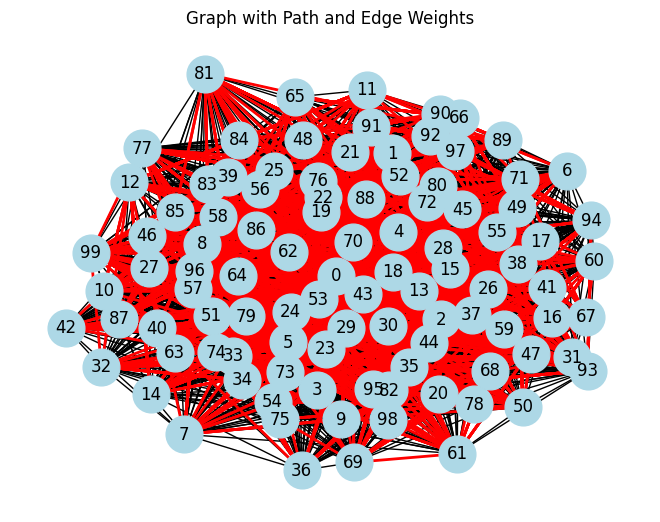

In [44]:
# Constants for the ACO algorithm
NB_FOURMIS = 10 # Number of ants
NB_ITERATIONS = 10  # Number of iterations
ALPHA = 1.0  # Influence of pheromones
BETA = 2.0  # Influence of the heuristic (inverse of the distance)
RHO = 0.5  # Pheromone evaporation rate
Q = 100  # Quantity of pheromones deposited


if __name__ == '__main__':
    n = 100
    phi = np.random.uniform(0.5, 5, (n, n))
    Temp = np.random.uniform(0, 20, (n, n))
    amplitude = 0.7
    offset = 0.3
    frequency = 0.5

    graph = generate_random_symmetrical_boolean_graph(n)
    collect_points = generate_random_collect_points(n)
    deliveries = generate_random_delivery_requests(n, collect_points)
    print("\n Deliveries:")
    for delivery in deliveries:
        print(f"Object from city {int(delivery[0])} need to be deliver in city: {int(delivery[1])}")

    best_path, best_cost, start_city, time_taken = ant_colony_optimization(graph, deliveries, phi, Temp, amplitude, offset, frequency)
    if best_path:
        print("\nBest path starting from city", start_city, ":", best_path)
        print("Cost of best path:", best_cost)
        print("Time taken:", time_taken, "seconds")
        draw_graph_with_path_and_weights(graph, best_path, phi, Temp, amplitude, offset, frequency)
    else:
        print("No valid path was found that meets all delivery requirements.")

# Partie 3 : Etude expérimentale

# Plan d'experience 
##  Méthodologie
 Pour évaluer les performances de notre algorithme, nous allons varier les paramètres suivants :

 - Nombre de villes (n) 
 - Amplitude du coût dynamique (amplitude) 
 - Offset du coût dynamique (offset) 
 - Fréquence du coût dynamique (frequency) 
 - Nombre de fourmis (nb_fourmis) 
 - Nombre d'itérations (nb_iterations)
 - Influence des phéromones (alpha) 
 - Influence de l'heuristique (beta) 
 - Taux d'évaporation des phéromones (rho) 
 - Quantité de phéromones déposée (q) 

## Etude du comportement des parametres 

In [22]:
def run_test(n, amplitude, offset, frequency, nb_fourmis, nb_iterations, alpha, beta, rho, q):
    global NB_FOURMIS, NB_ITERATIONS, ALPHA, BETA, RHO, Q
    NB_FOURMIS, NB_ITERATIONS, ALPHA, BETA, RHO, Q = nb_fourmis, nb_iterations, alpha, beta, rho, q
    
    phi = np.random.uniform(0.5, 5, (n, n))
    Temp = np.random.uniform(0, 20, (n, n))

    graph = generate_random_symmetrical_boolean_graph(n)
    collect_points = generate_random_collect_points(n)
    deliveries = generate_random_delivery_requests(n, collect_points)
    best_path, best_cost, start_city, time_taken = ant_colony_optimization(graph, deliveries, phi, Temp, amplitude, offset, frequency)
    if best_path:
        print("Cost of best path:", best_cost)
        print("Time taken:", time_taken, "seconds")    
    else:
        print("No valid path was found that meets all delivery requirements.")

In [23]:
def run_test_amplitude(n, amplitude_min, amplitude_max,amplitude_step, iterations):
    average_times =[]
    worst_times = []
    best_times = []
    

    nb_tests = ((amplitude_max	- amplitude_min) / amplitude_step) * iterations
    bar = IntProgress(min=0, max=nb_tests, layout={"width" : "100%"})
    display(bar)
    for amp in range(amplitude_min, amplitude_max, amplitude_step):
        best_time = float('inf')
        worst_time = 0
        average_time = 0
        amplitude = amp/10
        for i in range(iterations): 
            print(f"\nRunning test with amplitude: {amplitude}")
        
            start = time.time()
            run_test(n, amplitude, 0.3, 0.5, 10, 10, 1.0, 2.0, 0.5, 100)
            stop = time.time()

            tps = stop - start
            if(tps > worst_time):
                worst_time = tps

            if(tps < best_time):
                best_time = tps

            average_time += tps
            
            bar.value += 1 # on met à jour la barre de progression
        
        # on met à jour les listes des temps d'exécution
        average_times.append(average_time/iterations)
        best_times.append(best_time)
        worst_times.append(worst_time)

    # on cache la barre de progression
    bar.close()
    
    # on règle l'affichage des courbes
    amplitudes = [x for x in range(amplitude_min, amplitude_max, amplitude_step)]
    plt.figure(figsize=(20,10))
    
    plt.xlabel('amplitude')
    plt.xticks(ticks=amplitudes) # valeurs affichées sur l'axe X
    plt.ylabel('temps de calcul')
    
    # on charge les données
    plt.plot(amplitudes, average_times,   label='average time')
    plt.plot(amplitudes, best_times, label='best time')
    plt.plot(amplitudes, worst_times,  label='worst time')
    
    # on affiche
    plt.legend()
    plt.show()

IntProgress(value=0, layout=Layout(width='100%'), max=40)


Running test with amplitude: 0.7
Cost of best path: 60.6365
Time taken: 0.3532853126525879 seconds

Running test with amplitude: 0.7
Cost of best path: 156.8369
Time taken: 0.07549118995666504 seconds

Running test with amplitude: 0.7
Cost of best path: inf
Time taken: 0.19698476791381836 seconds

Running test with amplitude: 0.7
Cost of best path: 104.85829999999999
Time taken: 0.15415716171264648 seconds

Running test with amplitude: 0.7
Cost of best path: 187.6915
Time taken: 0.09942483901977539 seconds

Running test with amplitude: 0.7
Cost of best path: 79.1162
Time taken: 0.060903072357177734 seconds

Running test with amplitude: 0.7
Cost of best path: 78.39769999999999
Time taken: 0.12579631805419922 seconds

Running test with amplitude: 0.7
Cost of best path: 60.81220000000001
Time taken: 0.22945427894592285 seconds

Running test with amplitude: 0.7
Cost of best path: 64.86080000000001
Time taken: 0.10833096504211426 seconds

Running test with amplitude: 0.7
Cost of best path:

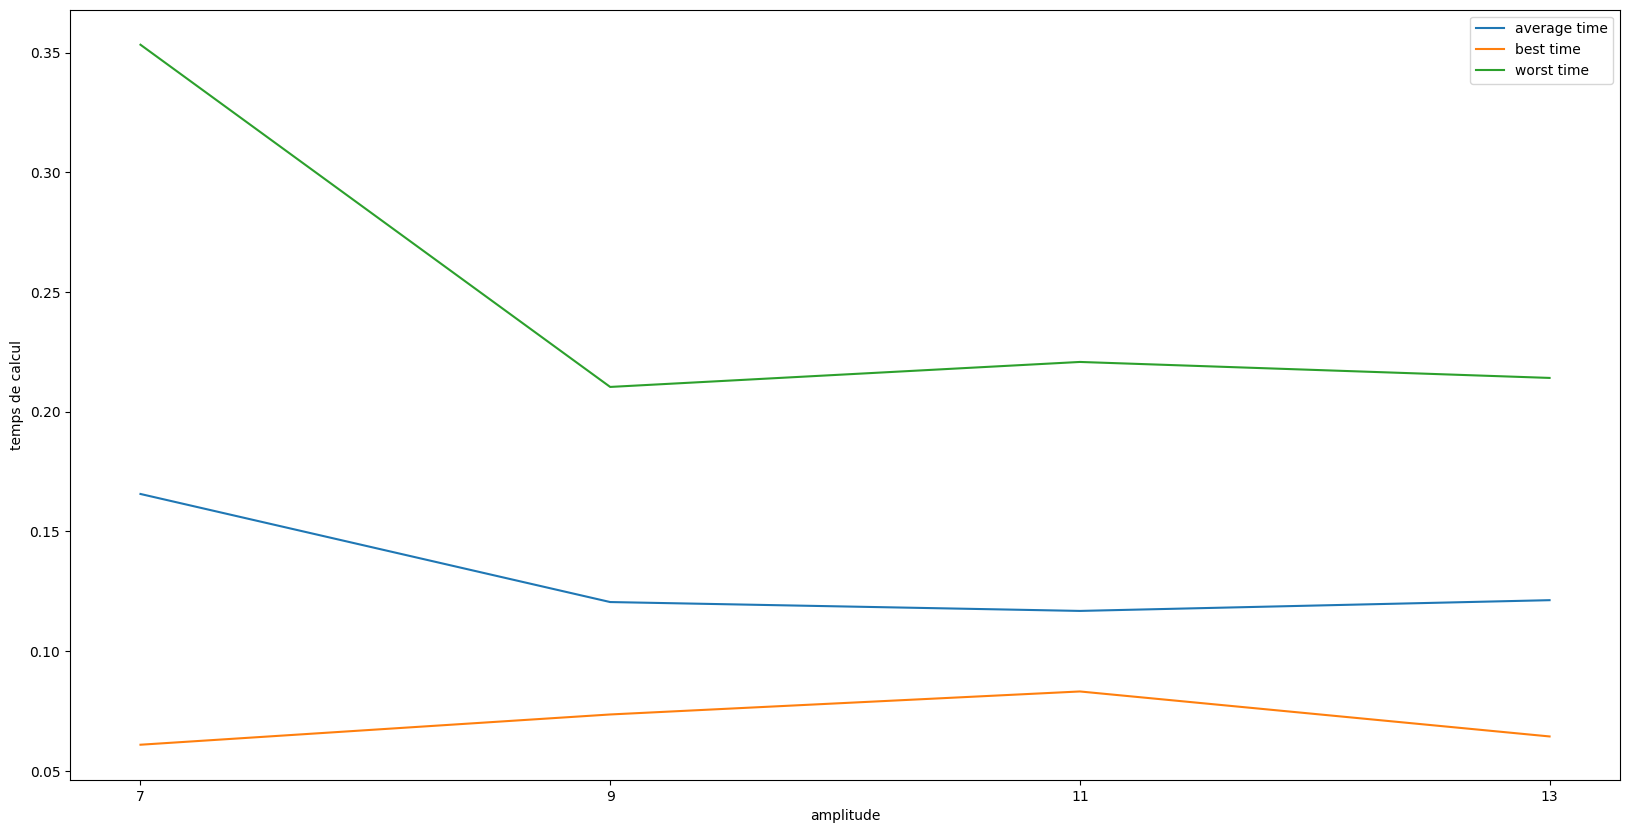

In [26]:
run_test_amplitude(10,7,15,2, 10)

In [24]:
def run_test_offset(n, offset_min, offset_max,offset_step, iterations):
    average_times =[]
    worst_times = []
    best_times = []
    

    nb_tests = ((offset_max	- offset_min) / offset_step) * iterations
    bar = IntProgress(min=0, max=nb_tests, layout={"width" : "100%"})
    display(bar)       
    for off in range(offset_min, offset_max,offset_step):
            best_time = float('inf')
            worst_time = 0
            average_time = 0
            offset = off/10
            for i in range(iterations): 
                print(f"\nRunning test with offset: {offset}")
            
                start = time.time()
                run_test(n, 0.7, offset, 0.5, 10, 10, 1.0, 2.0, 0.5, 100)
                stop = time.time()
    
                tps = stop - start
                if(tps > worst_time):
                    worst_time = tps
    
                if(tps < best_time):
                    best_time = tps
    
                average_time += tps
                
                bar.value += 1 # on met à jour la barre de progression
        
        # on met à jour les listes des temps d'exécution
            average_times.append(average_time/iterations)
            best_times.append(best_time)
            worst_times.append(worst_time)

    # on cache la barre de progression
    bar.close()
    
    # on règle l'affichage des courbes
    offsets = [x for x in range(offset_min, offset_max, offset_step)]
    plt.figure(figsize=(20,10))
    
    plt.xlabel('offset')
    plt.xticks(ticks=offsets) # valeurs affichées sur l'axe X
    plt.ylabel('temps de calcul')
    
    # on charge les données
    plt.plot(offsets, average_times,   label='average time')
    plt.plot(offsets, best_times, label='best time')
    plt.plot(offsets, worst_times,  label='worst time')
    
    # on affiche
    plt.legend()
    plt.show()

IntProgress(value=0, layout=Layout(width='100%'), max=80)


Running test with offset: 0.7
Cost of best path: 226.36060000000003
Time taken: 0.2789163589477539 seconds

Running test with offset: 0.7
Cost of best path: 90.67290000000001
Time taken: 0.1656494140625 seconds

Running test with offset: 0.7
Cost of best path: 147.0223
Time taken: 0.07749581336975098 seconds

Running test with offset: 0.7
Cost of best path: 120.06830000000001
Time taken: 0.0899660587310791 seconds

Running test with offset: 0.7
Cost of best path: inf
Time taken: 0.2471296787261963 seconds

Running test with offset: 0.7
Cost of best path: inf
Time taken: 0.24843239784240723 seconds

Running test with offset: 0.7
Cost of best path: 52.6625
Time taken: 0.14196181297302246 seconds

Running test with offset: 0.7
Cost of best path: 186.47709999999998
Time taken: 0.09288549423217773 seconds

Running test with offset: 0.7
Cost of best path: 313.4696999999999
Time taken: 0.17069625854492188 seconds

Running test with offset: 0.7
Cost of best path: 96.16509999999997
Time taken:

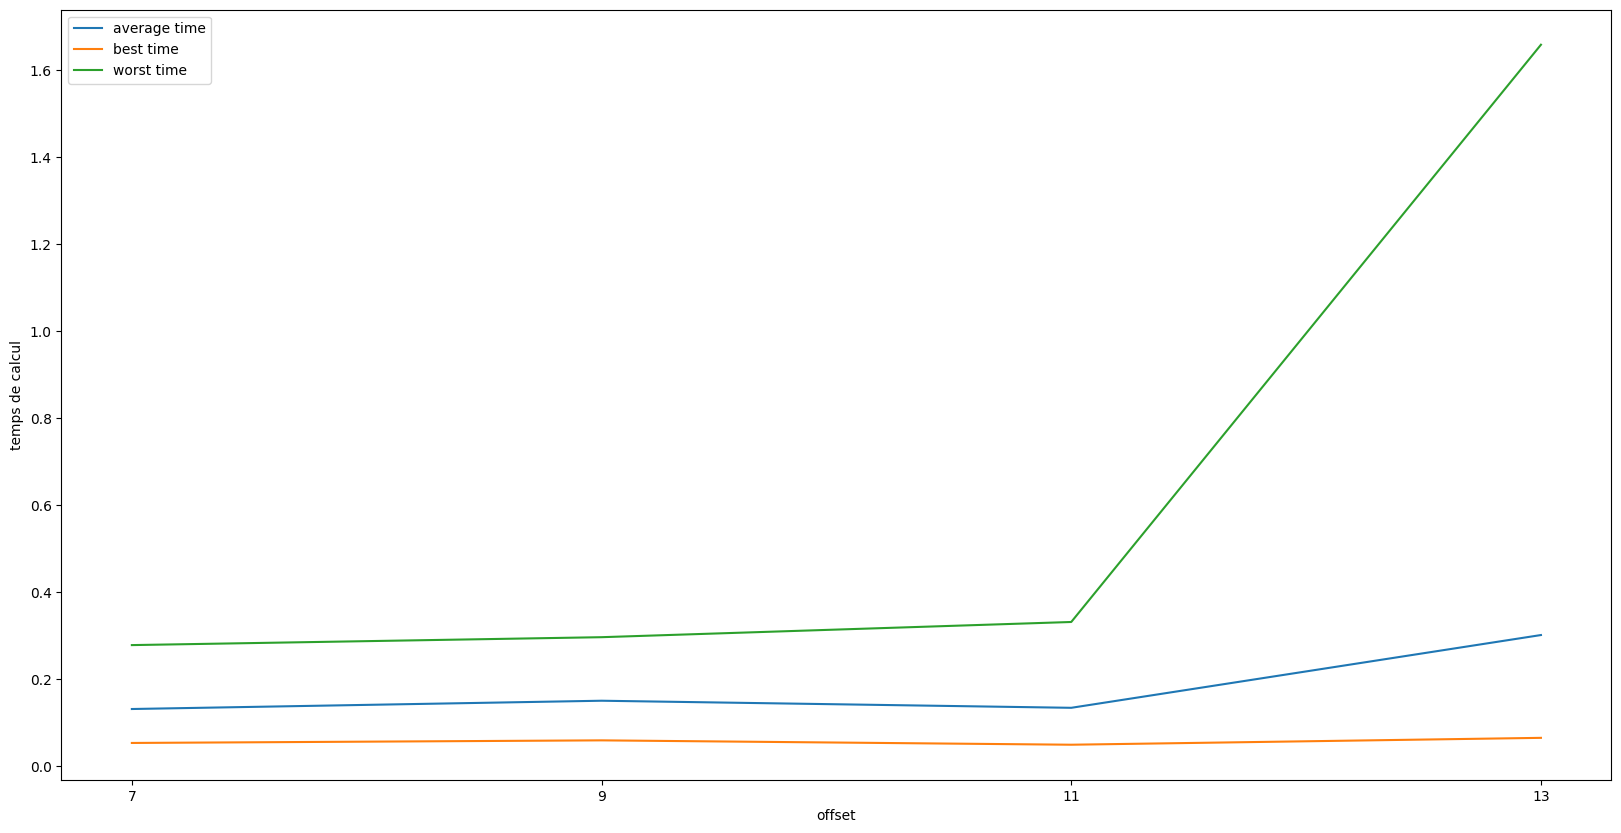

In [27]:
run_test_offset(10,7,15,2, 20)

In [28]:
def run_test_frequency(n,frequency_min, frequency_max,frequency_step, iterations):    
       
    average_times =[]
    worst_times = []
    best_times = []

    nb_tests = ((frequency_max	- frequency_min) / frequency_step) * iterations
    bar = IntProgress(min=0, max=nb_tests, layout={"width" : "100%"})
    display(bar)       
    for freq in range(frequency_min, frequency_max,frequency_step):
            best_time = float('inf')
            worst_time = 0
            average_time = 0
            frequencies = freq/10
            for i in range(iterations): 
                print(f"\nRunning test with frequency: {frequency}")
                start = time.time()
                run_test(n, 0.7, 0.3, frequency, 10, 10, 1.0, 2.0, 0.5, 100)
                stop = time.time()
    
                tps = stop - start
                if(tps > worst_time):
                    worst_time = tps
    
                if(tps < best_time):
                    best_time = tps
    
                average_time += tps
                
                bar.value += 1 # on met à jour la barre de progression
        
        # on met à jour les listes des temps d'exécution
            average_times.append(average_time/iterations)
            best_times.append(best_time)
            worst_times.append(worst_time)

    # on cache la barre de progression
    bar.close()
    
    # on règle l'affichage des courbes
    frequencies = [x for x in range(frequency_min, frequency_max, frequency_step)]
    plt.figure(figsize=(20,10))
    
    plt.xlabel('frequency')
    plt.xticks(ticks=frequencies) # valeurs affichées sur l'axe X
    plt.ylabel('temps de calcul')
    
    # on charge les données
    plt.plot(frequencies, average_times, label='average time')
    plt.plot(frequencies, best_times, label='best time')
    plt.plot(frequencies, worst_times,  label='worst time')
    
    # on affiche
    plt.legend()
    plt.show()

IntProgress(value=0, layout=Layout(width='100%'), max=40)


Running test with frequency: 0.5
Cost of best path: 111.35079999999999
Time taken: 0.08341312408447266 seconds

Running test with frequency: 0.5
Cost of best path: 61.730900000000005
Time taken: 0.13480925559997559 seconds

Running test with frequency: 0.5
Cost of best path: 162.375
Time taken: 0.09890198707580566 seconds

Running test with frequency: 0.5
Cost of best path: 89.511
Time taken: 0.07863402366638184 seconds

Running test with frequency: 0.5
Cost of best path: 127.79780000000001
Time taken: 0.1503760814666748 seconds

Running test with frequency: 0.5
Cost of best path: 66.4958
Time taken: 0.12448978424072266 seconds

Running test with frequency: 0.5
Cost of best path: inf
Time taken: 0.1353294849395752 seconds

Running test with frequency: 0.5
Cost of best path: 41.9422
Time taken: 0.04616975784301758 seconds

Running test with frequency: 0.5
Cost of best path: 94.63
Time taken: 0.08925795555114746 seconds

Running test with frequency: 0.5
Cost of best path: 63.4746
Time t

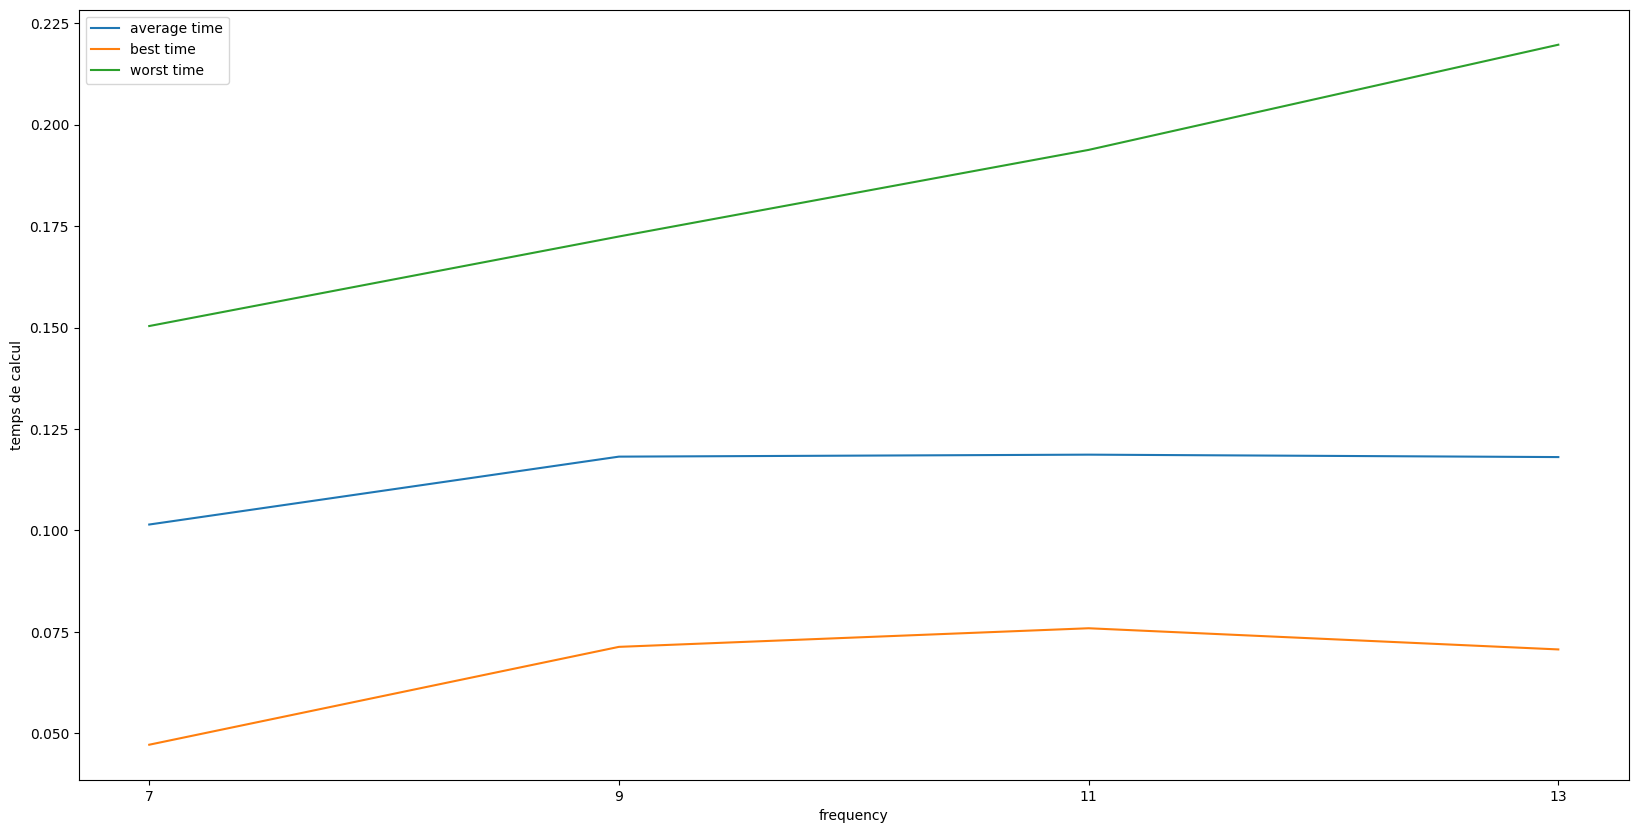

In [29]:
run_test_frequency(10, 7,15,2, 10)

In [30]:
def run_test_alpha(n, alpha_min, alpha_max, alpha_step, iterations):    
    average_times =[]
    worst_times = []
    best_times = []

    nb_tests = ((alpha_max	- alpha_min) / alpha_step) * iterations
    bar = IntProgress(min=0, max=nb_tests, layout={"width" : "100%"})
    display(bar)       
    for al in range(alpha_min, alpha_max,alpha_step):
            best_time = float('inf')
            worst_time = 0
            average_time = 0
            alpha = al/10
            for i in range(iterations): 
                print(f"\nRunning test with alpha: {alpha}")
                start = time.time()
                run_test(n, 0.7, 0.3, 0.5, 10, 10, alpha, 2.0, 0.5, 100)
                stop = time.time()
    
                tps = stop - start
                if(tps > worst_time):
                    worst_time = tps
    
                if(tps < best_time):
                    best_time = tps
    
                average_time += tps
                
                bar.value += 1 # on met à jour la barre de progression
        
        # on met à jour les listes des temps d'exécution
            average_times.append(average_time/iterations)
            best_times.append(best_time)
            worst_times.append(worst_time)

    # on cache la barre de progression
    bar.close()
    
    # on règle l'affichage des courbes
    alphas = [x for x in range(alpha_min, alpha_max, alpha_step)]
    plt.figure(figsize=(20,10))
    
    plt.xlabel('alpha')
    plt.xticks(ticks=alphas) # valeurs affichées sur l'axe X
    plt.ylabel('temps de calcul')
    
    # on charge les données
    plt.plot(alphas, average_times, label='average time')
    plt.plot(alphas, best_times, label='best time')
    plt.plot(alphas, worst_times,  label='worst time')
    
    # on affiche
    plt.legend()
    plt.show()

IntProgress(value=0, layout=Layout(width='100%'), max=20)


Running test with alpha: 1.0
Cost of best path: 100.2028
Time taken: 0.1037142276763916 seconds

Running test with alpha: 1.0
Cost of best path: 34.324099999999994
Time taken: 0.12024569511413574 seconds

Running test with alpha: 1.0
Cost of best path: inf
Time taken: 0.11215615272521973 seconds

Running test with alpha: 1.0
Cost of best path: 104.99810000000001
Time taken: 0.18518972396850586 seconds

Running test with alpha: 1.0
Cost of best path: 95.9077
Time taken: 0.07196950912475586 seconds

Running test with alpha: 1.0
Cost of best path: 109.108
Time taken: 0.07193231582641602 seconds

Running test with alpha: 1.0
Cost of best path: inf
Time taken: 0.10870838165283203 seconds

Running test with alpha: 1.0
Cost of best path: 152.16219999999996
Time taken: 0.3290882110595703 seconds

Running test with alpha: 1.0
Cost of best path: 9.4763
Time taken: 0.052034854888916016 seconds

Running test with alpha: 1.0
Cost of best path: 120.6385
Time taken: 0.11430072784423828 seconds

Runn

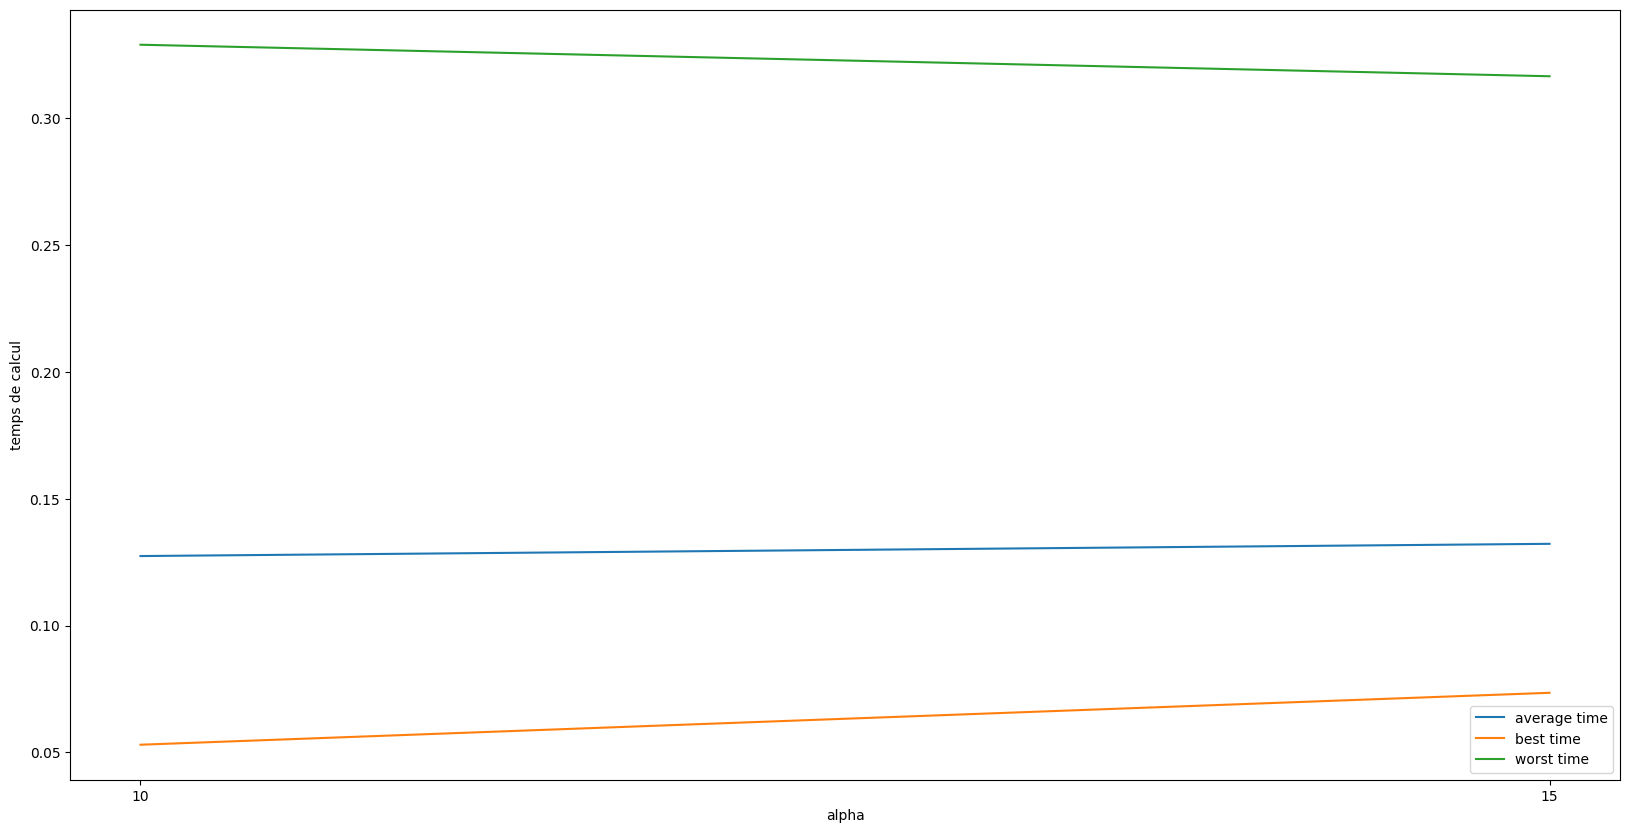

In [31]:
run_test_alpha(10, 10,20,5,10)

In [32]:
def run_test_beta(n,beta_min, beta_max, beta_step, iterations):
    average_times =[]
    worst_times = []
    best_times = []

    nb_tests = ((beta_max	- beta_min) / beta_step) * iterations
    bar = IntProgress(min=0, max=nb_tests, layout={"width" : "100%"})
    display(bar)       
    for bet in range(beta_min, beta_max,beta_step):
            best_time = float('inf')
            worst_time = 0
            average_time = 0
            beta = bet/10
            for i in range(iterations): 
                print(f"\nRunning test with beta: {beta}")
                start = time.time()
                run_test(n, 0.7, 0.3, 0.5, 10, 10, 1.0, beta, 0.5, 100)
                stop = time.time()
    
                tps = stop - start
                if(tps > worst_time):
                    worst_time = tps
    
                if(tps < best_time):
                    best_time = tps
    
                average_time += tps
                
                bar.value += 1 # on met à jour la barre de progression
        
        # on met à jour les listes des temps d'exécution
            average_times.append(average_time/iterations)
            best_times.append(best_time)
            worst_times.append(worst_time)

    # on cache la barre de progression
    bar.close()
    
    # on règle l'affichage des courbes
    betas = [x for x in range(beta_min, beta_max, beta_step)]
    plt.figure(figsize=(20,10))
    
    plt.xlabel('beta')
    plt.xticks(ticks=betas) # valeurs affichées sur l'axe X
    plt.ylabel('temps de calcul')
    
    # on charge les données
    plt.plot(betas, average_times, label='average time')
    plt.plot(betas, best_times, label='best time')
    plt.plot(betas, worst_times,  label='worst time')
    
    # on affiche
    plt.legend()
    plt.show()

IntProgress(value=0, layout=Layout(width='100%'), max=20)


Running test with beta: 2.0
Cost of best path: 62.93339999999999
Time taken: 0.21165752410888672 seconds

Running test with beta: 2.0
Cost of best path: 131.2303
Time taken: 0.16122055053710938 seconds

Running test with beta: 2.0
Cost of best path: 66.7696
Time taken: 0.14442992210388184 seconds

Running test with beta: 2.0
Cost of best path: 133.0675
Time taken: 0.15403532981872559 seconds

Running test with beta: 2.0
Cost of best path: 66.1452
Time taken: 0.08007383346557617 seconds

Running test with beta: 2.0
Cost of best path: 159.3447
Time taken: 0.11356496810913086 seconds

Running test with beta: 2.0
Cost of best path: 92.3929
Time taken: 0.09243249893188477 seconds

Running test with beta: 2.0
Cost of best path: 191.5802
Time taken: 0.17607951164245605 seconds

Running test with beta: 2.0
Cost of best path: 14.354700000000001
Time taken: 0.10658788681030273 seconds

Running test with beta: 2.0
Cost of best path: 67.3625
Time taken: 0.07607531547546387 seconds

Running test w

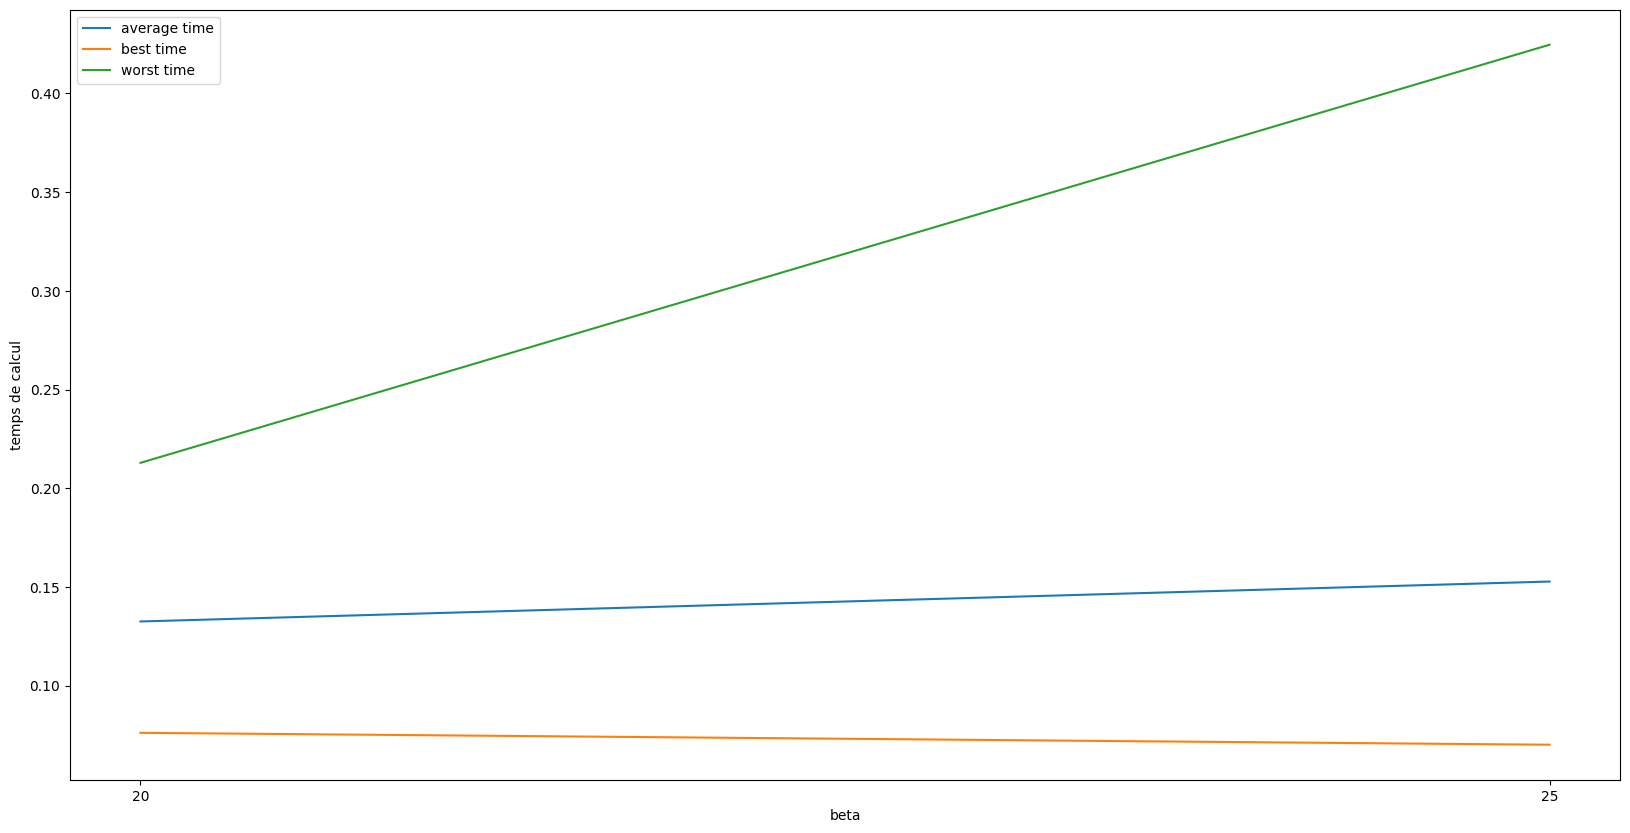

In [33]:
run_test_beta(10,20,30,5,10)

In [34]:
def run_test_rho(n,roh_min, roh_max, roh_step, iterations):
    average_times =[]
    worst_times = []
    best_times = []

    nb_tests = ((roh_max	- roh_min) / roh_step) * iterations
    bar = IntProgress(min=0, max=nb_tests, layout={"width" : "100%"})
    display(bar)       
    for rh in range(roh_min, roh_max,roh_step):
            best_time = float('inf')
            worst_time = 0
            average_time = 0
            roh = rh/10
            for i in range(iterations): 
                print(f"\nRunning test with rho: {roh}")
                start = time.time()
                run_test(n, 0.7, 0.3, 0.5, 10, 10, 1.0, 2.0, roh, 100)

                stop = time.time()
    
                tps = stop - start
                if(tps > worst_time):
                    worst_time = tps
    
                if(tps < best_time):
                    best_time = tps
    
                average_time += tps
                
                bar.value += 1 # on met à jour la barre de progression
        
        # on met à jour les listes des temps d'exécution
            average_times.append(average_time/iterations)
            best_times.append(best_time)
            worst_times.append(worst_time)

    # on cache la barre de progression
    bar.close()
    
    # on règle l'affichage des courbes
    rohs = [x for x in range(roh_min, roh_max, roh_step)]
    plt.figure(figsize=(20,10))
    
    plt.xlabel('rohs')
    plt.xticks(ticks=rohs) # valeurs affichées sur l'axe X
    plt.ylabel('temps de calcul')
    
    # on charge les données
    plt.plot(rohs, average_times, label='average time')
    plt.plot(rohs, best_times, label='best time')
    plt.plot(rohs, worst_times,  label='worst time')
    
    # on affiche
    plt.legend()
    plt.show()

IntProgress(value=0, layout=Layout(width='100%'), max=20)


Running test with rho: 0.5
Cost of best path: 77.0535
Time taken: 0.1716289520263672 seconds

Running test with rho: 0.5
Cost of best path: 97.80969999999999
Time taken: 0.10312151908874512 seconds

Running test with rho: 0.5
Cost of best path: 145.9359
Time taken: 0.15904450416564941 seconds

Running test with rho: 0.5
Cost of best path: 92.46329999999999
Time taken: 0.17308735847473145 seconds

Running test with rho: 0.5
Cost of best path: 105.4041
Time taken: 0.29790282249450684 seconds

Running test with rho: 0.5
Cost of best path: 67.5645
Time taken: 0.08335614204406738 seconds

Running test with rho: 0.5
Cost of best path: 121.7821
Time taken: 0.12038135528564453 seconds

Running test with rho: 0.5
Cost of best path: 125.92139999999999
Time taken: 0.19318103790283203 seconds

Running test with rho: 0.5
Cost of best path: 98.9885
Time taken: 0.10866117477416992 seconds

Running test with rho: 0.5
Cost of best path: 116.67799999999998
Time taken: 0.14533495903015137 seconds

Runni

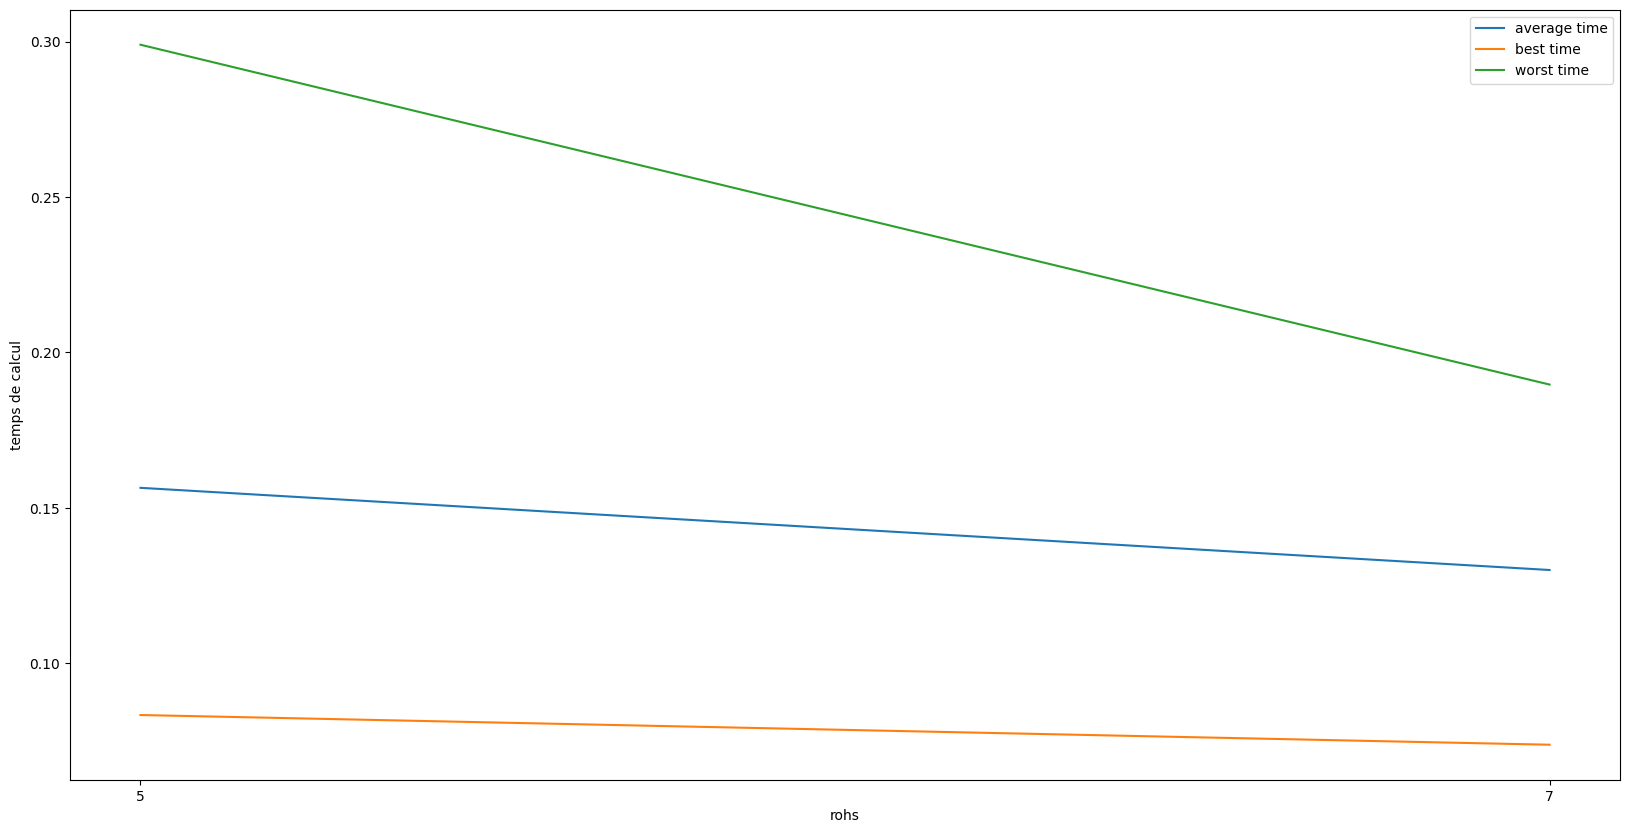

In [35]:
run_test_rho(10, 5,9,2,10)

In [36]:
def run_test_q(n,q_min, q_max, q_step, iterations):
    average_times =[]
    worst_times = []
    best_times = []

    nb_tests = ((q_max	- q_min) / q_step) * iterations
    bar = IntProgress(min=0, max=nb_tests, layout={"width" : "100%"})
    display(bar)       
    for qq in range(q_min, q_max,q_step):
            best_time = float('inf')
            worst_time = 0
            average_time = 0
            q = qq/10
            for i in range(iterations): 
                print(f"\nRunning test with q: {q}")
                start = time.time()
                run_test(n, 0.7, 0.3, 0.5, 10, 10, 1.0, 2.0, 0.5, q)

                stop = time.time()
    
                tps = stop - start
                if(tps > worst_time):
                    worst_time = tps
    
                if(tps < best_time):
                    best_time = tps
    
                average_time += tps
                
                bar.value += 1 # on met à jour la barre de progression
        
        # on met à jour les listes des temps d'exécution
            average_times.append(average_time/iterations)
            best_times.append(best_time)
            worst_times.append(worst_time)

    # on cache la barre de progression
    bar.close()
    
    # on règle l'affichage des courbes
    qs = [x for x in range(q_min, q_max, q_step)]
    plt.figure(figsize=(20,10))
    
    plt.xlabel('q')
    plt.xticks(ticks=qs) # valeurs affichées sur l'axe X
    plt.ylabel('temps de calcul')
    
    # on charge les données
    plt.plot(qs, average_times, label='average time')
    plt.plot(qs, best_times, label='best time')
    plt.plot(qs, worst_times,  label='worst time')
    
    # on affiche
    plt.legend()
    plt.show()

IntProgress(value=0, layout=Layout(width='100%'), max=200)


Running test with q: 100.0
Cost of best path: 75.7644
Time taken: 0.08371233940124512 seconds

Running test with q: 100.0
Cost of best path: 55.522999999999996
Time taken: 0.08267879486083984 seconds

Running test with q: 100.0
Cost of best path: 49.8274
Time taken: 0.11899805068969727 seconds

Running test with q: 100.0
Cost of best path: 103.85350000000003
Time taken: 0.1978774070739746 seconds

Running test with q: 100.0
Cost of best path: 87.356
Time taken: 0.10878443717956543 seconds

Running test with q: 100.0
Cost of best path: 107.14089999999999
Time taken: 0.0843052864074707 seconds

Running test with q: 100.0
Cost of best path: 103.25260000000002
Time taken: 0.20789575576782227 seconds

Running test with q: 100.0
Cost of best path: 74.3368
Time taken: 0.10667657852172852 seconds

Running test with q: 100.0
Cost of best path: 195.04120000000003
Time taken: 0.2943716049194336 seconds

Running test with q: 100.0
Cost of best path: 105.44349999999999
Time taken: 0.09539341926574

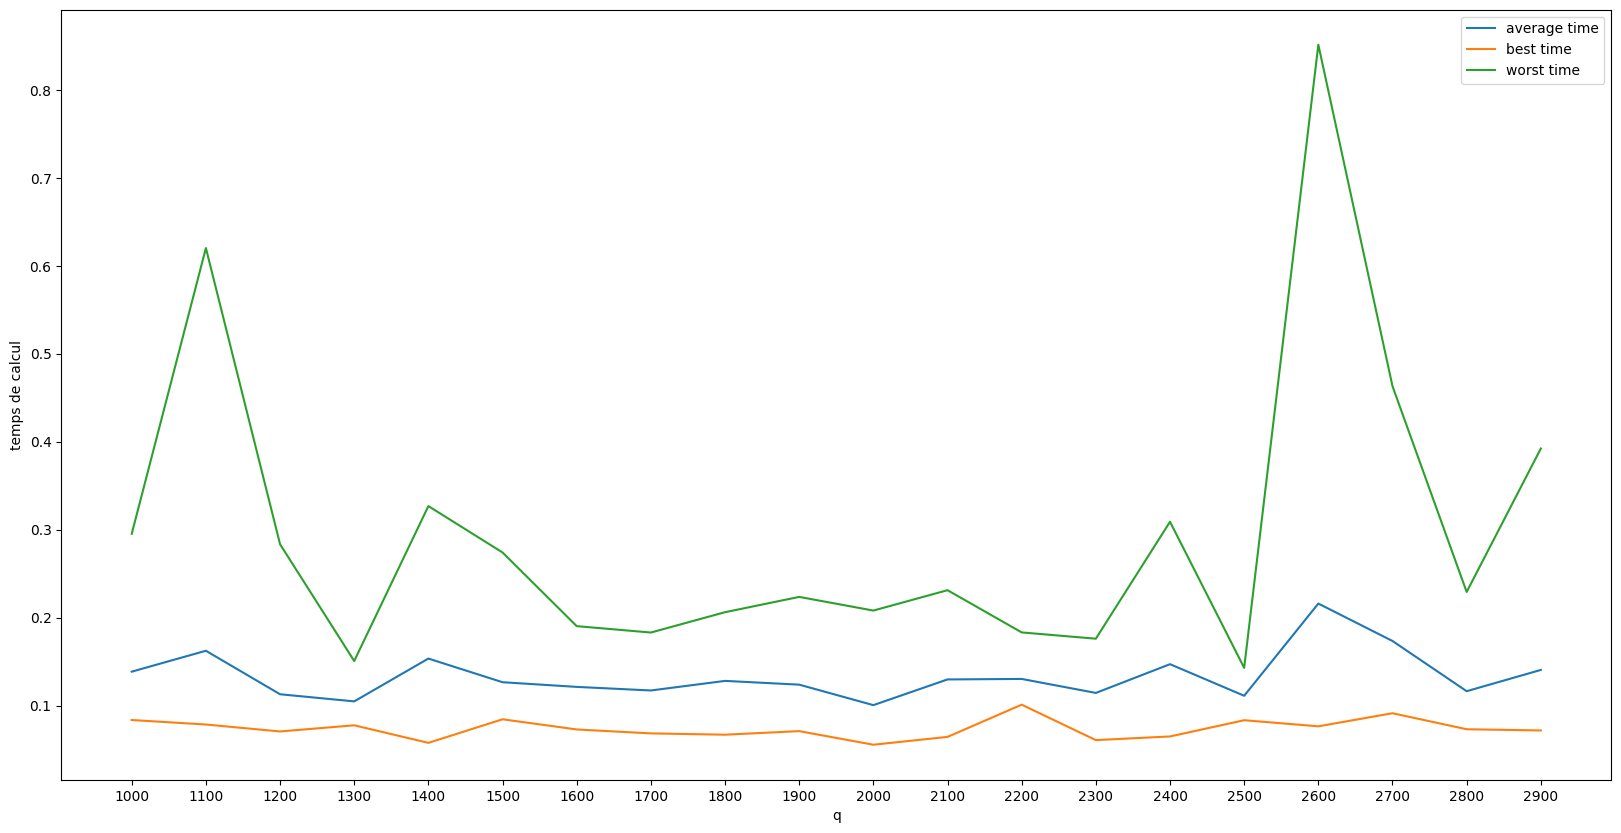

In [37]:
run_test_q(10, 1000,3000, 100,10)

 # Paramètre n
Description: Ce paramètre détermine le nombre de villes (nœuds) dans le graphe.
Impact:
Taille du graphe: Plus n est grand, plus le graphe est grand, ce qui augmente la complexité du problème.
Nombre de chemins possibles: Une augmentation de n entraîne une augmentation exponentielle du nombre de chemins possibles, rendant le problème plus difficile à résoudre.
Performance: Une plus grande valeur de n nécessite plus de temps de calcul et de mémoire pour explorer les chemins et trouver le meilleur chemin.

# Paramètre amplitude
Description: Ce paramètre contrôle l'amplitude des variations sinusoïdales dans la fonction de coût dynamique C.
Impact:
Variabilité du coût: Une plus grande amplitude signifie que les coûts peuvent varier de manière plus significative en fonction du temps, rendant le problème plus complexe.
Difficulté à prévoir les coûts: Avec une plus grande amplitude, il est plus difficile de prévoir les coûts futurs, ce qui peut compliquer la recherche du chemin optimal.

# Paramètre offset
Description: Ce paramètre contrôle la valeur de décalage dans la fonction de coût dynamique C.
Impact:
Niveau de base du coût: Un offset plus élevé augmente les valeurs de base du coût, rendant tous les trajets plus coûteux.
Difficulté relative des chemins: En ajustant le niveau de base des coûts, ce paramètre peut influencer la difficulté relative de différents chemins, affectant ainsi les décisions prises par l'algorithme.

# Paramètre frequency
Description: Ce paramètre contrôle la fréquence des oscillations dans la fonction de coût dynamique C.
Impact:
Changement rapide des coûts: Une fréquence plus élevée signifie que les coûts changent plus rapidement en fonction du temps, rendant la dynamique des coûts plus volatile.
Complexité temporelle: Des fréquences plus élevées introduisent plus de variations temporelles, ce qui peut compliquer la recherche du chemin optimal car les coûts changent rapidement avec le temps.

# phi : Paramètre de modulation 
Influence : Ce paramètre peut influencer la fonction de coût utilisée pour évaluer les solutions. Une valeur appropriée de phi peut aider à équilibrer différents facteurs dans le coût.


# Temp : 
Influence : c'est une valeur pseudo-aléatoire fixe pour chaque paire de sommets, générée une fois et utilisée pour introduire de l'aléatoire sans perdre la continuité temporelle.

# Nombre de fourmis :

Influence : Plus il y a de fourmis, plus l'exploration de l'espace de recherche est exhaustive. Cela peut améliorer la qualité des solutions trouvées, mais augmente également le temps de calcul.


# Nombre d'itérations :

Influence : Plus le nombre d'itérations est élevé, plus l'algorithme a de chances de trouver une solution optimale, mais cela augmente aussi le temps de calcul.

# Alpha :
Influence : Plus la valeur de alpha est élevée, plus les fourmis sont attirées par les chemins avec des niveaux élevés de phéromones. Cela favorise l'exploitation des chemins connus.


## Beta :
Influence : Plus la valeur de beta est élevée, plus les fourmis sont attirées par les chemins les plus courts ou moins coûteux. Cela favorise l'exploration des chemins plus prometteurs.




# Rho :
Influence : Plus le taux d'évaporation est élevé, plus les phéromones se dissipent rapidement, ce qui empêche les solutions anciennes de dominer trop longtemps. Cela favorise l'exploration de nouvelles solutions.



# Q :

Influence : Plus la quantité de phéromones déposée est élevée, plus l'influence d'une fourmi sur le chemin choisi est grande. Cela peut accélérer la convergence vers une solution, mais augmente aussi le risque de convergence prématurée.


# Conclusion et Recommandations pour l'Amélioration des Performances de l'Algorithme
## Analyse des Paramètres et de leur Impact
Au cours de cette étude expérimentale, nous avons analysé l'impact de divers paramètres sur les performances de notre algorithme de colonie de fourmis (ACO) appliqué à un problème de collecte et de livraison. Les paramètres testés incluent le nombre de villes, les paramètres du coût dynamique (amplitude, offset, fréquence), et les paramètres de l'ACO (nombre de fourmis, nombre d'itérations, alpha, beta, rho, q). Voici les conclusions principales et les recommandations pour améliorer le coût, le chemin trouvé et le temps d'exécution :
Pour obtenir les meilleures performances en termes de coût, de qualité du chemin et de temps d'exécution, il est crucial de trouver un équilibre entre les différents paramètres de l'algorithme : 

- Pour un meilleur coût et chemin : il faut augmenter le nombre d'itérations et ajuster alpha et beta pour équilibrer l'exploration et l'exploitation, ajuster des coûts dynamiques via les paramètres d'amplitude, offset et fréquence est également essentielle. pour les paramètres de l'ACO il faut, Alpha (1.0-1.5) : Augmenter alpha pour renforcer l'influence des phéromones et encourager l'exploitation, ou diminuer alpha pour favoriser l'exploration. 
Beta (2.0-3.0) : Augmenter beta pour renforcer l'influence de l'heuristique et encourager l'exploration de nouveaux chemins, ou diminuer beta pour réduire cette influence.
Pour les parametres comme l'amplitude, offset et la fréquencenous vous conseillons, une amplitude entre 0.7 et 1.0 permet de créer suffisamment de variations pour favoriser l'exploration sans rendre l'algorithme trop instable, un offset dans entre 0.3 -0.5 stabilise les coûts de base, évitant les chemins non représentatifs et permettant une meilleure comparaison des chemins et une fréquence entre 0.5 et 1.0 permet de modéliser des fluctuations réalistes sans introduire de variations trop rapides ou trop lentes.

 - Pour un temps d'exécution réduit : Limiter le nombre de fourmis et d'itérations à des valeurs modérées tout en maintenant des taux d'évaporation et des quantités de phéromones appropriées pour éviter une convergence trop lente ou une stagnation. Nous vous conseillons d'utiliser un taux d'évaporation modéré (0.5-0.7) pour maintenir un bon équilibre entre l'exploration et l'exploitation. Augmenter rho pour favoriser l'exploration, ou diminuer rho pour renforcer l'influence des phéromones mais aussi d'utiliser une valeur modérée de q (100-200) semble optimale pour favoriser la convergence sans causer de stagnation. Augmenter q pour encourager la convergence, ou diminuer q pour éviter la stagnation prématurée.
